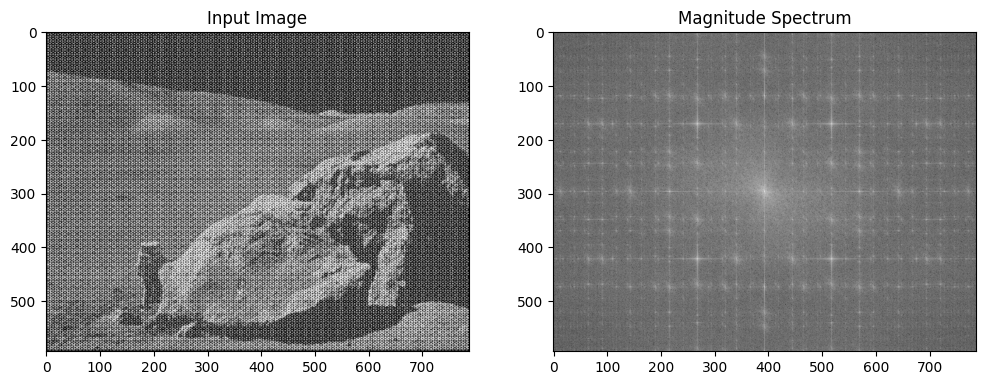

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.show()


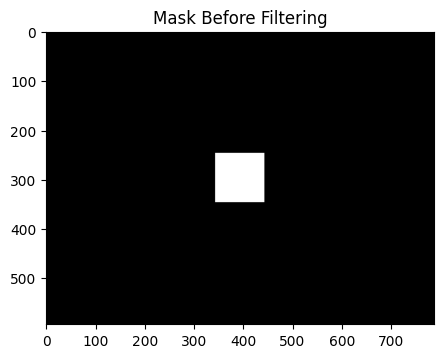

In [2]:
rows, cols = img.shape

mask = np.zeros((rows, cols, 2), np.uint8)
cx, cy = rows//2, cols//2
mask[cx-50:cx+50, cy-50:cy+50, :] = 1

plt.figure(figsize=(5,5))
plt.imshow(mask[:,:,0], cmap='gray')
plt.title("Mask Before Filtering")
plt.show()


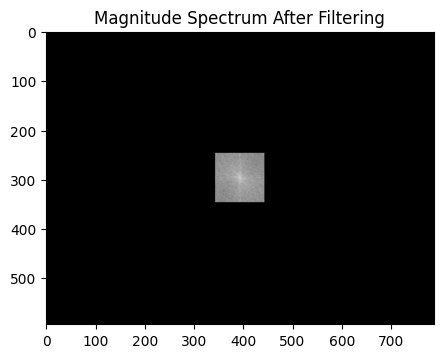

In [3]:
filtered_dft = dft_shift * mask

filtered_mag = 20 * np.log(cv.magnitude(filtered_dft[:,:,0], filtered_dft[:,:,1]) + 1)


plt.figure(figsize=(5,5))
plt.imshow(filtered_mag, cmap='gray')
plt.title("Magnitude Spectrum After Filtering")
plt.show()


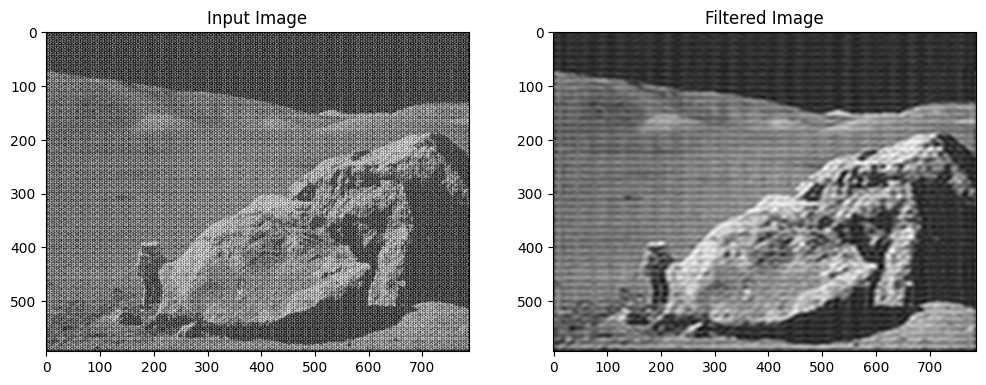

In [4]:
f_ishift = np.fft.ifftshift(filtered_dft)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(img_back, cmap='gray'), plt.title('Filtered Image')
plt.show()


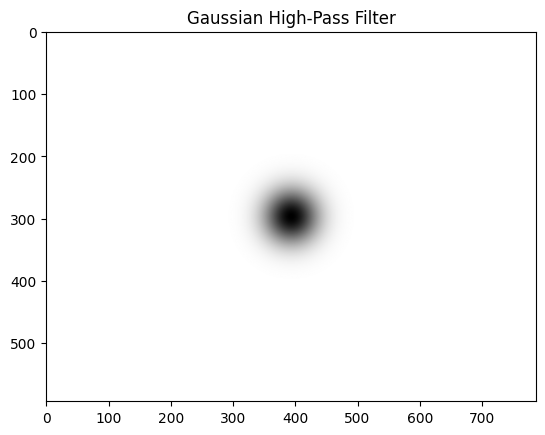

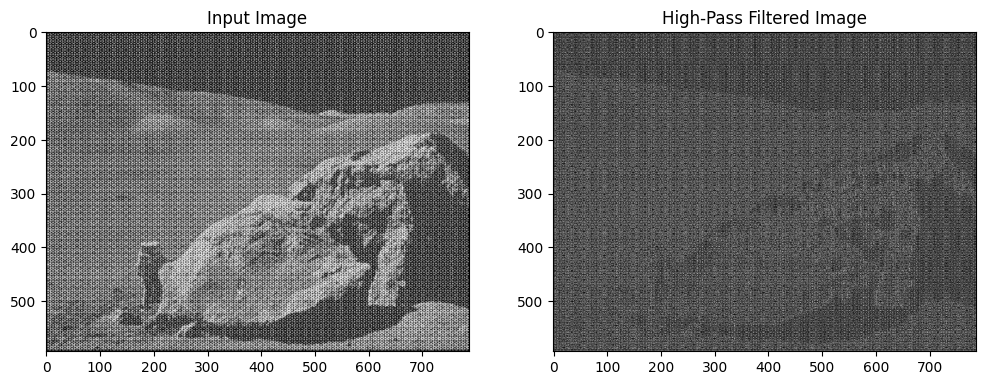

In [5]:
rows, cols = img.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

sigma = 30
gauss_lp = np.exp(-((x-cols/2)**2 + (y-rows/2)**2)/(2*sigma*sigma))
gauss_hp = 1 - gauss_lp

plt.imshow(gauss_hp, cmap='gray')
plt.title("Gaussian High-Pass Filter")
plt.show()

dft_hp = dft_shift * gauss_hp[:,:,None]
hp_ishift = np.fft.ifftshift(dft_hp)
hp_img = cv.idft(hp_ishift)
hp_img = cv.magnitude(hp_img[:,:,0], hp_img[:,:,1])

plt.figure(figsize=(12,5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(hp_img, cmap='gray'), plt.title('High-Pass Filtered Image')
plt.show()


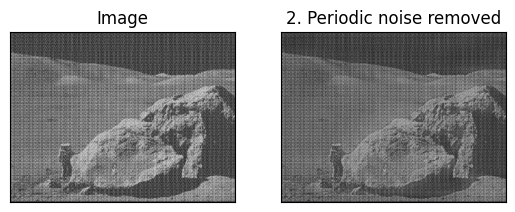

In [6]:
# 2) Удаление периодического шума
dft_shift = np.fft.fftshift(cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT))

mask = np.ones((rows, cols, 2), dtype=np.float32)

peaks = [
    (cy - 83, cx - 107),
    (cy - 83, cx + 107),
    (cy + 83, cx - 107),
    (cy + 83, cx + 107)
]

for py, px in peaks:
    cv.circle(mask, (px, py), 13, (0, 0), -1)

dft_shift = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('2. Periodic noise removed'), plt.xticks([]), plt.yticks([])
plt.show()